<a href="https://colab.research.google.com/github/MorojMunshi/Lab/blob/main/MRI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import io
import glob
import math
from PIL import Image
import cv2
from numpy.random import randint
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_parquet('/content/Train.parquet')
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [ ]:
def load_image_as_np_array(image_bytes):
    try:
        np_array = np.frombuffer(image_bytes, np.uint8)
        image = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            return image
        else:
            print("Error: Unable to decode image.")
            return None
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


In [ ]:
x = []
y = []
for i in range(len(df)):
    row = df.iloc[i]
    image_info = row['image']
    image_bytes = image_info['bytes']
    image_path = image_info['path']
    image_label = row['label']
    image_np_array = load_image_as_np_array(image_bytes)
    if image_np_array is not None:
        if len(image_np_array.shape) == 3:
            x.append(image_np_array)
            y.append(image_label)
        else:
            print(f"Ignoring image with unexpected shape: {image_np_array.shape}")

In [ ]:
x[0].shape


(128, 128, 3)

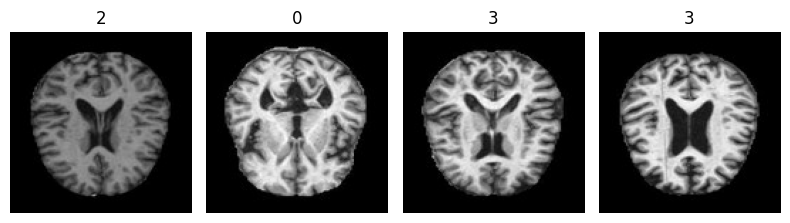

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(8, 3))

for i in range(4):
    ax = axes[i]
    ax.imshow(x[i], cmap='viridis')
    ax.set_title(y[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.10,random_state=51,shuffle=True)

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
#data normalization

x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3), input_shape=(128,128,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.05),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(512,(3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.05),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(4,activation='softmax'),
])


In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │              

 Total params: 1,843,844 (7.03 MB)

 Trainable params: 1,841,604 (7.03 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [ ]:
class new_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9855:
            self.model.stop_training = True

stop_epoch= new_callback()

In [ ]:
warnings.filterwarnings('ignore')
model_hist=model.fit(x_train,y_train,epochs=10, batch_size=32, callbacks=[stop_epoch], validation_split=.05)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.5175 - loss: 1.0578 - val_accuracy: 0.5541 - val_loss: 3.3425
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.6526 - loss: 0.7559 - val_accuracy: 0.4459 - val_loss: 1.5510
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.7524 - loss: 0.5940 - val_accuracy: 0.5541 - val_loss: 3.2152
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8294 - loss: 0.4181 - val_accuracy: 0.6234 - val_loss: 0.9972
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9033 - loss: 0.2926 - val_accuracy: 0.5368 - val_loss: 1.3039
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9232 - loss: 0.2116 - val_accuracy: 0.8095 - val_loss: 0.5096
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.9430 - loss: 0.1511 - val_accuracy: 0.8355 - val_loss: 0.3855
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.9554 - loss: 0.1204 - val_accu

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 483ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 483ms/step


In [ ]:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}
class_names= list(mapping_dict.values())
print(classification_report(y_test,y_pred, target_names=class_names))

               precision    recall  f1-score   support

    Mild_Sick       1.00      0.87      0.93        70
Moderate_Sick       1.00      1.00      1.00         2
     Non_Sick       0.98      0.86      0.92       265
    Very_Sick       0.80      0.99      0.89       175

     accuracy                           0.91       512
    macro avg       0.95      0.93      0.93       512
 weighted avg       0.92      0.91      0.91       512



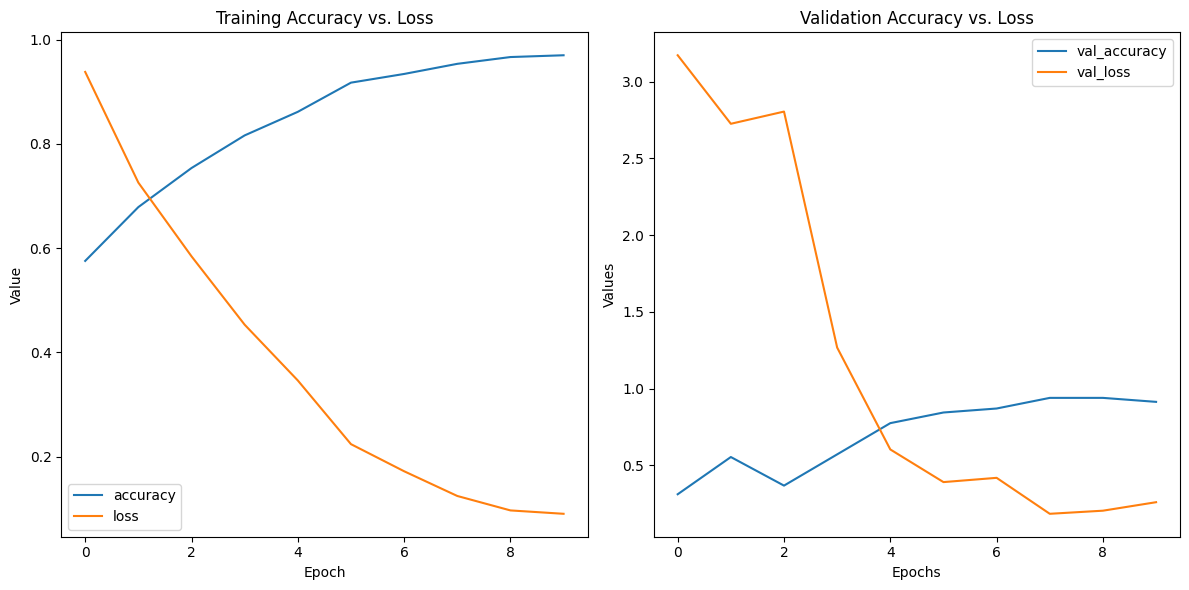

In [ ]:
#pd.DataFrame(model_hist.history).plot()
history_df = pd.DataFrame(model_hist.history)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
history_df[['accuracy', 'loss']].plot(ax=ax1)
ax1.set_title('Training Accuracy vs. Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Value')
history_df[['val_accuracy', 'val_loss']].plot(ax=ax2)
ax2.set_title('Validation Accuracy vs. Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Values')
plt.tight_layout()
plt.show()

In [ ]:
test_df=pd.read_parquet('Test.parquet')
test_df.head()

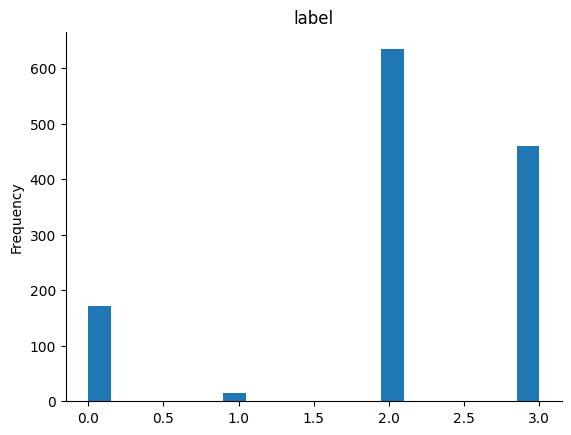

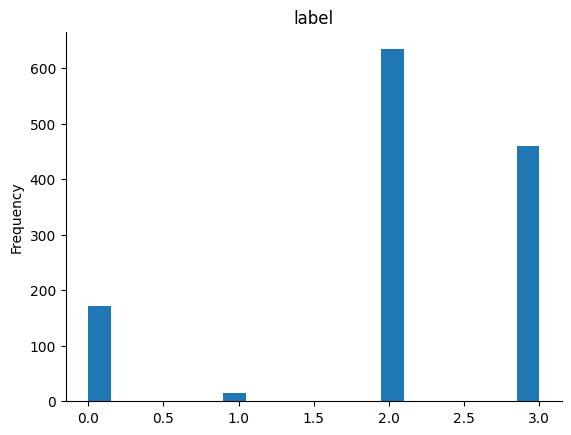

In [ ]:
# @title label

from matplotlib import pyplot as plt
test_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_x=[]
test_y=[]
for i in range(len(test_df)):
    row = test_df.iloc[i]
    image_info = row['image']
    image_bytes = image_info['bytes']
    image_path = image_info['path']
    image_label=row['label']
    image_np_array = load_image_as_np_array(image_bytes)
    if image_np_array is not None:
        if len(image_np_array.shape) == 3:
            test_x.append(image_np_array)
            test_y.append(image_label)
        else:
            print(f"Ignoring image with unexpected shape: {image_np_array.shape}")

In [ ]:
test_x=np.array(test_x)
test_x=test_x/255.0
test_y=np.array(test_y)

In [ ]:
#before apply 10 accuracy 49%

In [ ]:
l, a = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy: {a*100}%')

In [ ]:
#after
l, a = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy: {a*100}%')

Accuracy: 91.95312261581421%


In [ ]:
test_y_pred=model.predict(test_x)
test_y_pred=np.argmax(test_y_pred, axis=1)
test_y_pred[:5]

40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 405ms/step


array([3, 2, 2, 3, 0])

In [ ]:
print(classification_report(test_y,test_y_pred,target_names=class_names))

               precision    recall  f1-score   support

    Mild_Sick       1.00      0.85      0.92       172
Moderate_Sick       1.00      0.93      0.97        15
     Non_Sick       0.98      0.89      0.93       634
    Very_Sick       0.84      0.99      0.91       459

     accuracy                           0.92      1280
    macro avg       0.95      0.91      0.93      1280
 weighted avg       0.93      0.92      0.92      1280



In [ ]:
test_y = np.vectorize(mapping_dict.get)(test_y)
test_y_pred = np.vectorize(mapping_dict.get)(test_y_pred)

In [ ]:
cm=confusion_matrix(test_y,test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

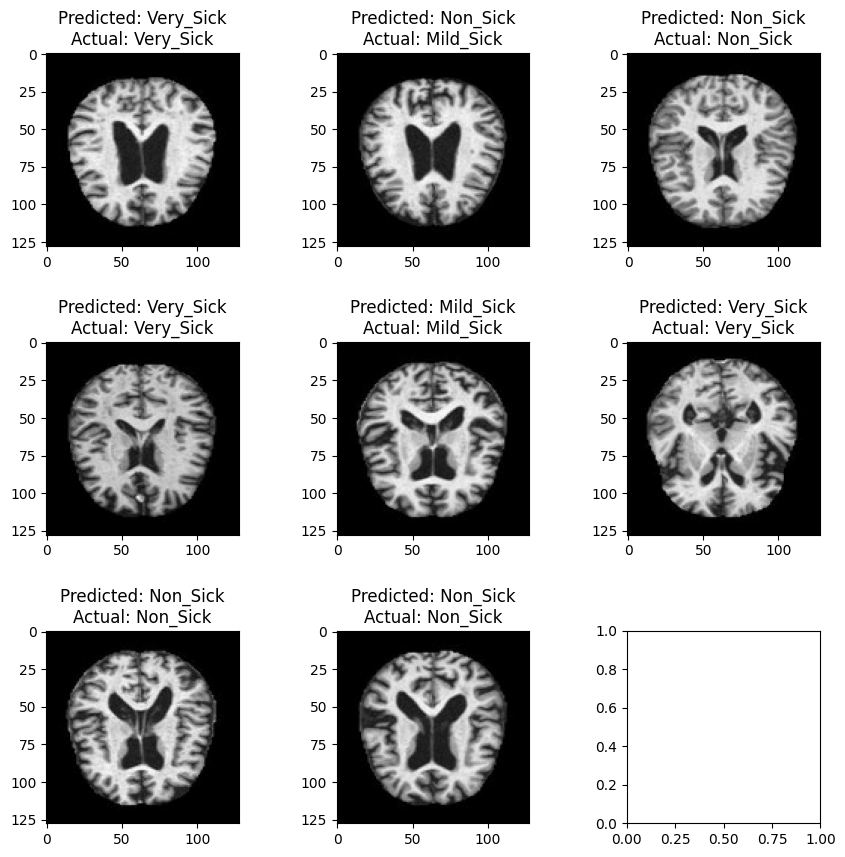

In [ ]:
%matplotlib inline

num_images = randint(6, 12)
rows = math.ceil(math.sqrt(num_images))
cols = math.ceil(num_images / rows)

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(num_images):
    row = i // cols
    col = i % cols
    ax = axes[row, col] if num_images > 1 else axes
    ax.imshow(test_x[i], cmap='viridis')
    ax.set_title(f"Predicted: {test_y_pred[i]}\nActual: {test_y[i]}")

In [ ]:
ax.axis('off')

# Hide any unused subplots
for i in range(num_images, rows * cols):
    if num_images > 1:
        fig.delaxes(axes.flatten()[i])
    else:
        fig.delaxes(axes)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# prompt: I want apply image and make predicion

import numpy as np
# Load the image
image_path = '/content/IMG_4739.jpeg'
image_np_array = load_image_as_np_array(open(image_path, 'rb').read())

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (128, 128))
image_np_array = image_np_array / 255.0

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Predicted class: Very_Sick


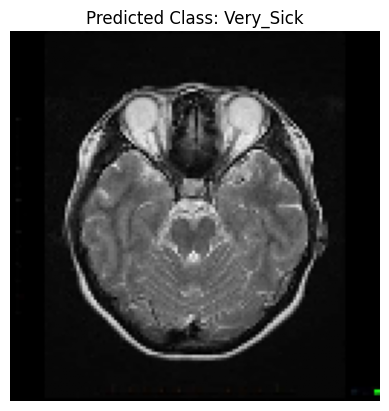

               precision    recall  f1-score   support

    Mild_Sick       1.00      0.85      0.92       172
Moderate_Sick       1.00      0.93      0.97        15
     Non_Sick       0.98      0.89      0.93       634
    Very_Sick       0.84      0.99      0.91       459

     accuracy                           0.92      1280
    macro avg       0.95      0.91      0.93      1280
 weighted avg       0.93      0.92      0.92      1280



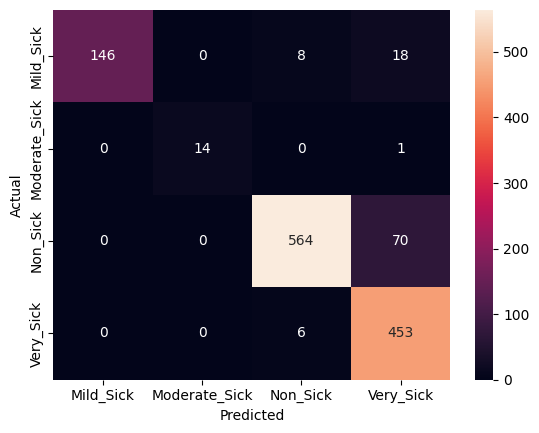

In [ ]:
# prompt: show the imahe and analysis in graph

import matplotlib.pyplot as plt
# Display the image
plt.imshow(image_np_array, cmap='viridis')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()

# Print the classification report
print(classification_report(test_y, test_y_pred, target_names=class_names))

# Show the confusion matrix
cm = confusion_matrix(test_y, test_y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: Very_Sick


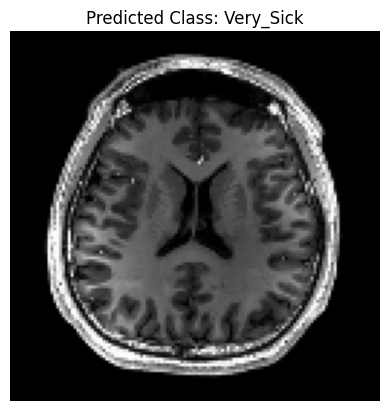

In [ ]:
# prompt: I want apply CNN model and make prediction

import matplotlib.pyplot as plt
import numpy as np
# Load the image
image_path = '/content/IMG_4738.jpeg'
image_np_array = load_image_as_np_array(open(image_path, 'rb').read())

# Preprocess the image
image_np_array = cv2.resize(image_np_array, (128, 128))
image_np_array = image_np_array / 255.0

# Make a prediction
prediction = model.predict(np.expand_dims(image_np_array, axis=0))

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Print the prediction
print(f"Predicted class: {predicted_class_name}")


# Display the image
plt.imshow(image_np_array, cmap='viridis')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.4575 - loss: 1.1160 - val_accuracy: 0.6009 - val_loss: 0.8968
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5737 - loss: 0.9005 - val_accuracy: 0.6052 - val_loss: 0.8001
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.6372 - loss: 0.8109 - val_accuracy: 0.6551 - val_loss: 0.7191
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7563 - loss: 0.5910 - val_accuracy: 0.7766 - val_loss: 0.5209
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8414 - loss: 0.3783 - val_accuracy: 0.8243 - val_loss: 0.4354
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9186 - loss: 0.2237 - val_accuracy: 0.8850 - val_loss: 0.3374
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9544 - loss: 0.1289 - val_accuracy: 0.8829 - val_loss: 0.3655
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9781 - loss: 0.0770 - val_accu

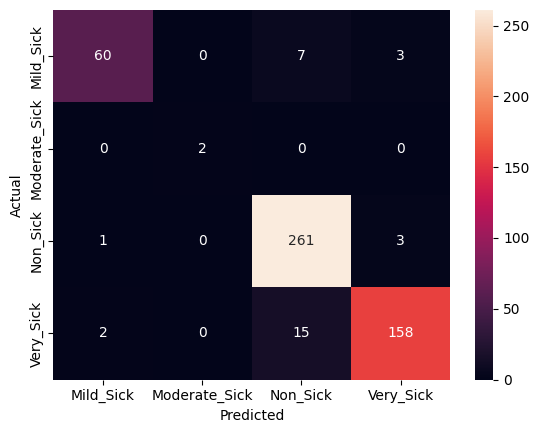

In [ ]:
# prompt: I want apply CNN model on this dataset

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Predict the labels of the test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))

# Show the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# نموذج VGG (مثل VGG16) من مكتبة Keras

In [ ]:
!pip install tensorflow

In [ ]:
# Ensure TensorFlow is installed (only needed if not using Colab)
!pip install tensorflow

# Import necessary libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Modify based on the number of classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,338 (68.38 MB)

 Trainable params: 3,211,650 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
print(f"test_x dtype: {test_x.dtype}, shape: {test_x.shape}")
print(f"test_y dtype: {test_y.dtype}, shape: {test_y.shape}")

test_x dtype: float64, shape: (1280, 128, 128, 3)
test_y dtype: <U13, shape: (1280,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# إنشاء كائن LabelEncoder
label_encoder = LabelEncoder()

# تحويل القيم النصية إلى أرقام
test_y = label_encoder.fit_transform(test_y)

# عرض التصنيفات المشفرة
print("Encoded Classes:", label_encoder.classes_)

Encoded Classes: ['Mild_Sick' 'Moderate_Sick' 'Non_Sick' 'Very_Sick']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# التأكد من استدعاء مكتبة pandas مع الاسم المستعار pd
import pandas as pd

# ... (الكود السابق) ...

# تحميل بيانات الصور والتسميات من ملفات Parquet
df_train = pd.read_parquet('/content/Train.parquet')
df_val = pd.read_parquet('/content/Test.parquet')

# ... (بقية الكود) ...

In [ ]:
# ... previous code ...

# التأكد من استدعاء مكتبة pandas مع الاسم المستعار pd
import pandas as pd

# ... (الكود السابق) ...

# تحميل بيانات الصور والتسميات من ملفات Parquet
df_train = pd.read_parquet('/content/Train.parquet')
df_val = pd.read_parquet('/content/Test.parquet')

# Define the mapping_dict here, before it's used:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}

# Now you can use mapping_dict:
df_train['label'] = df_train['label'].map(mapping_dict)
df_val['label'] = df_val['label'].map(mapping_dict)

In [ ]:
df_train['image_path'] = '/content/IMG_4740.jpeg'
df_val['image_path'] = '/content/IMG_4740.jpeg'

In [ ]:
# Assume your image paths are stored in the 'path' key under the 'image' column
df_train['image_path'] = df_train['image'].apply(lambda x: x['path'])
df_val['image_path'] = df_val['image'].apply(lambda x: x['path'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

# تحميل بيانات الصور والتسميات من ملفات Parquet
df_train = pd.read_parquet('/content/Train.parquet')
df_val = pd.read_parquet('/content/Test.parquet')

# Define the mapping_dict here, before it's used:
mapping_dict={
    0: 'Mild_Sick',
    1: 'Moderate_Sick',
    2: 'Non_Sick',
    3: 'Very_Sick'
}

# Now you can use mapping_dict:
df_train['label'] = df_train['label'].map(mapping_dict)
df_val['label'] = df_val['label'].map(mapping_dict)

# Assume your image paths are stored in the 'path' key under the 'image' column
#df_train['image_path'] = df_train['image'].apply(lambda x: x['path'])
#df_val['image_path'] = df_val['image'].apply(lambda x: x['path'])


# Function to load image from bytes
def load_image_from_bytes(image_bytes):
    image = tf.image.decode_jpeg(image_bytes, channels=3)  # Assuming JPEG format
    image = tf.image.resize(image, [150, 150])  # Resize to match VGG16 input
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image

# Prepare data for ImageDataGenerator
train_images = [load_image_from_bytes(row['image']['bytes']) for _, row in df_train.iterrows()]
train_labels = pd.get_dummies(df_train['label']).values # One-hot encode labels

val_images = [load_image_from_bytes(row['image']['bytes']) for _, row in df_val.iterrows()]
val_labels = pd.get_dummies(df_val['label']).values # One-hot encode labels

train_images = np.array(train_images)
val_images = np.array(val_images)


# إعداد ImageDataGenerator للبيانات التدريبية والاختبارية
train_datagen = ImageDataGenerator(
    # ... (any augmentations you want to apply)
)
validation_datagen = ImageDataGenerator(
    # ... (any augmentations you want to apply)
)

# Use flow() method instead of flow_from_directory()
train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=32,
    shuffle=True,
    # ... (other parameters)
)

validation_generator = validation_datagen.flow(
    x=val_images,
    y=val_labels,
    batch_size=32,
    shuffle=False, # Don't shuffle validation data
    # ... (other parameters)
)

# ... (rest of your code to build and train the model)

In [ ]:
# بناء نموذج VGG16 مع الطبقات المسبقة التدريب
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# تجميد الطبقات السابقة
base_model.trainable = False

# إضافة طبقات جديدة للنموذج
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')  # Changed to 4 neurons and softmax activation
])

# تجميع النموذج
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Changed loss to categorical_crossentropy

# تحقق من محتويات المولدات
print(f'Train Generator: {len(train_generator)} batches')
print(f'Validation Generator: {len(validation_generator)} batches')

# تدريب النموذج
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Train Generator: 160 batches
Validation Generator: 40 batches
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 1751s 11s/step - accuracy: 0.5150 - loss: 1.1605 - val_accuracy: 0.5648 - val_loss: 1.0059
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1698s 11s/step - accuracy: 0.6711 - loss: 0.7600 - val_accuracy: 0.6375 - val_loss: 0.7769
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1681s 11s/step - accuracy: 0.7597 - loss: 0.5961 - val_accuracy: 0.7039 - val_loss: 0.7991
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1707s 11s/step - accuracy: 0.7784 - loss: 0.5509 - val_accuracy: 0.7719 - val_loss: 0.5722
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1682s 11s/step - accuracy: 0.8296 - loss: 0.4279 - val_accuracy: 0.6180 - val_loss: 0.9047
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1699s 11s/step - accuracy: 0.8092 - loss: 0.4606 - val_accuracy: 0.8195 - val_loss: 0.4729
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1685s 11s/step - accuracy: 0.8654 - loss: 0.3411 - val_accuracy: 0.8281 - val_loss: 0.4553
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1692s 11s/step - accuracy: 0.8701 - loss: 0.3266 - val

In [1]:
# حفظ النموذج بعد التدريب
model.save('vgg16_model.h5')

# عرض ملخص النموذج
model.summary()

NameError: name 'model' is not defined